In [8]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [9]:
df=pd.read_csv('Data/DenguDisease-1.csv')
df.head()

,Temperature,Humidity,Precipitation,Cases
0,28.68,88.81,15.46,6
1,28.41,88.81,13.69,186
2,27.83,89.25,7.07,267
3,25.58,85.62,4.42,248
4,22.49,80.06,0.87,0


In [10]:
x = np.median(df["Cases"])
x

496.5

In [11]:
df["Cases"]=np.where(df["Cases"]<495, "0", "1")
df.head()

,Temperature,Humidity,Precipitation,Cases
0,28.68,88.81,15.46,0
1,28.41,88.81,13.69,0
2,27.83,89.25,7.07,0
3,25.58,85.62,4.42,0
4,22.49,80.06,0.87,0


In [12]:
y = df['Cases']
X = df.drop(['Cases'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90, random_state=42)

In [13]:
clf=GaussianNB()
clf.fit(X_train,y_train)

GaussianNB()

In [14]:
y_pred=clf.predict(X_test)


In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
print(accuracy_score(y_test, y_pred))

0.5294117647058824


In [19]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 9 17]
 [ 7 18]]
              precision    recall  f1-score   support

           0       0.56      0.35      0.43        26
           1       0.51      0.72      0.60        25

    accuracy                           0.53        51
   macro avg       0.54      0.53      0.51        51
weighted avg       0.54      0.53      0.51        51



In [20]:
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.simplefilter(action ="ignore", category=FutureWarning)

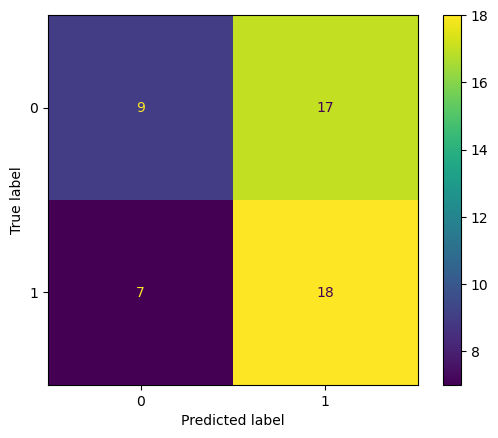

In [21]:
plot_confusion_matrix(clf, X_test, y_test, display_labels = [0, 1] )